In [1]:
# Simulation parameters
num_simulations <- 1000  # Number of simulation runs
sample_size <- 100        # Sample size for each simulation
population_size <- 10000  # Size of the population

# Define a population income distribution (e.g., log-normal to mimic income)
# Adjust parameters to change inequality (mu and sigma)
population_income <- rlnorm(population_size, meanlog = 8, sdlog = 1.5)  # Log-normal

# Initialize vectors to store simulation results
sample_means <- numeric(num_simulations)
deviations_within_k_sd <- numeric(num_simulations)

# Chebyshev's Theorem parameter:  k standard deviations from the mean
k <- 2

# Perform the simulations
for (i in 1:num_simulations) {
  # Draw a random sample from the population
  sample_income <- sample(population_income, sample_size, replace = FALSE)
  sample_means[i] <- mean(sample_income)
}

# Calculate population mean and standard deviation (for comparison)
population_mean <- mean(population_income)
population_sd <- sd(population_income)

#Chebyshev's calculation on Sample Means
sample_mean_mean = mean(sample_means)
sample_mean_sd = sd(sample_means)

# Calculate how many sample means fall within k standard deviations of the population mean
deviations_within_k_sd <- abs(sample_means - population_mean) <= k * sample_mean_sd
proportion_within_k_sd <- mean(deviations_within_k_sd)

# Chebyshev's Theorem states: P(|X - mu| >= k*sigma) <= 1/k^2
# Therefore: P(|X - mu| < k*sigma) >= 1 - 1/k^2

chebyshev_lower_bound <- 1 - (1 / k^2)

# Results
cat("Population Mean:", population_mean, "\n")
cat("Population SD:", population_sd, "\n")
cat("Sample Mean of Sample Means:", sample_mean_mean, "\n")
cat("Sample SD of Sample Means:", sample_mean_sd, "\n")
cat("Proportion of Sample Means within", k, "SD of Population Mean:", proportion_within_k_sd, "\n")
cat("Chebyshev's Lower Bound for", k, "SD:", chebyshev_lower_bound, "\n")
cat("Chebyshev's Theorem holds:", proportion_within_k_sd >= chebyshev_lower_bound, "\n")

Population Mean: 9141.028 
Population SD: 25498.46 
Sample Mean of Sample Means: 9177.137 
Sample SD of Sample Means: 2695.495 
Proportion of Sample Means within 2 SD of Population Mean: 0.947 
Chebyshev's Lower Bound for 2 SD: 0.75 
Chebyshev's Theorem holds: TRUE 


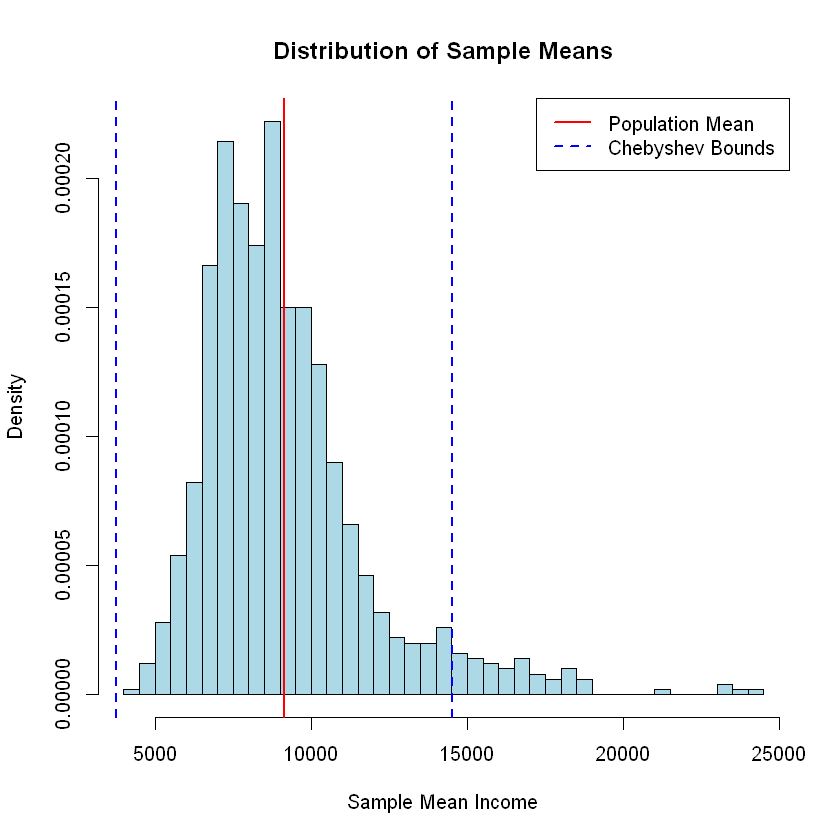

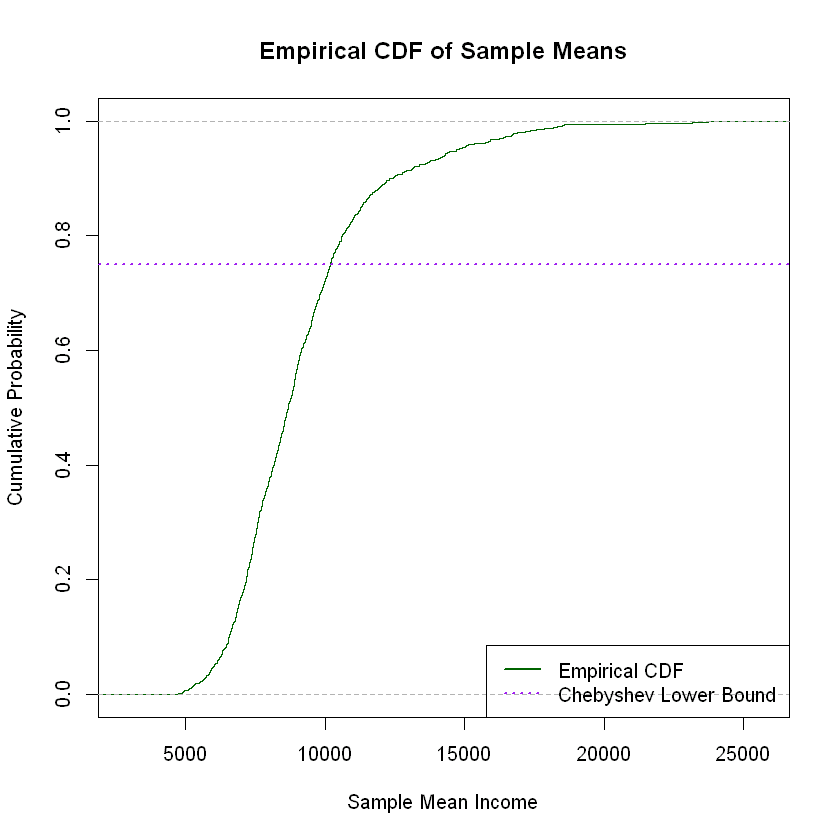

In [2]:

# --- Visualization ---

# 1. Histogram of Sample Means with Chebyshev's bounds
hist(sample_means, breaks = 30, main = "Distribution of Sample Means",
     xlab = "Sample Mean Income", col = "lightblue", freq = FALSE)
abline(v = population_mean, col = "red", lwd = 2) # Population mean
abline(v = population_mean + k * sample_mean_sd, col = "blue", lwd = 2, lty = 2) # Upper Chebyshev bound
abline(v = population_mean - k * sample_mean_sd, col = "blue", lwd = 2, lty = 2) # Lower Chebyshev bound
legend("topright", legend = c("Population Mean", "Chebyshev Bounds"),
       col = c("red", "blue"), lty = c(1, 2), lwd = 2)

# 2. Empirical CDF of Sample Means vs. Chebyshev Bounds
ecdf_values <- ecdf(sample_means)
plot(ecdf_values, main = "Empirical CDF of Sample Means",
     xlab = "Sample Mean Income", ylab = "Cumulative Probability",
     col = "darkgreen")
abline(h = chebyshev_lower_bound, col = "purple", lwd = 2, lty = 3) # Chebyshev Lower Bound Line
legend("bottomright", legend = c("Empirical CDF", "Chebyshev Lower Bound"),
       col = c("darkgreen", "purple"), lty = c(1, 3), lwd = 2)

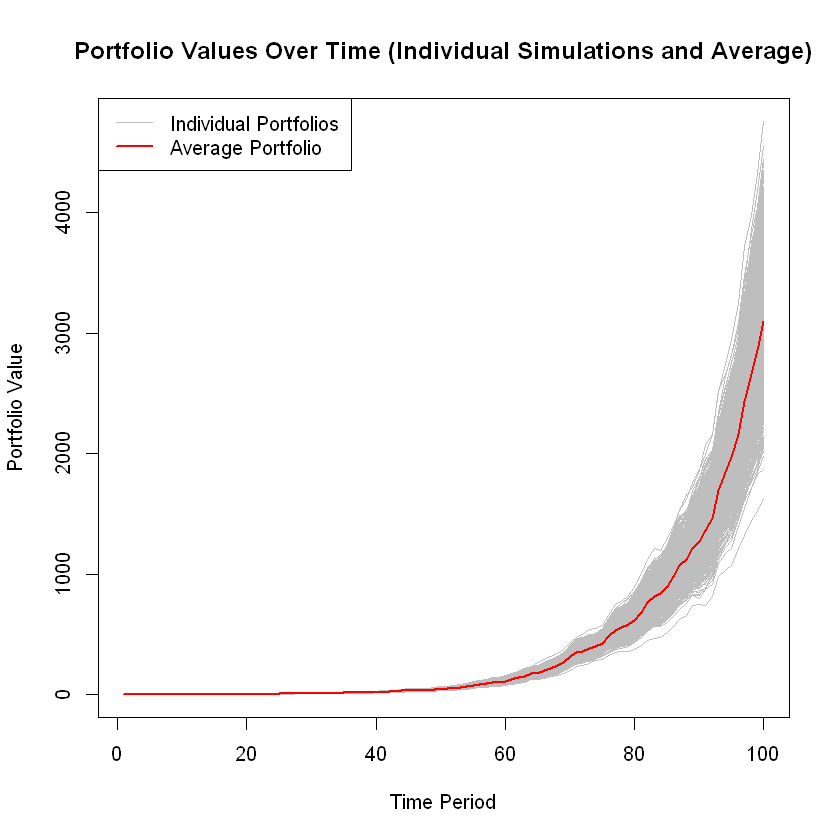

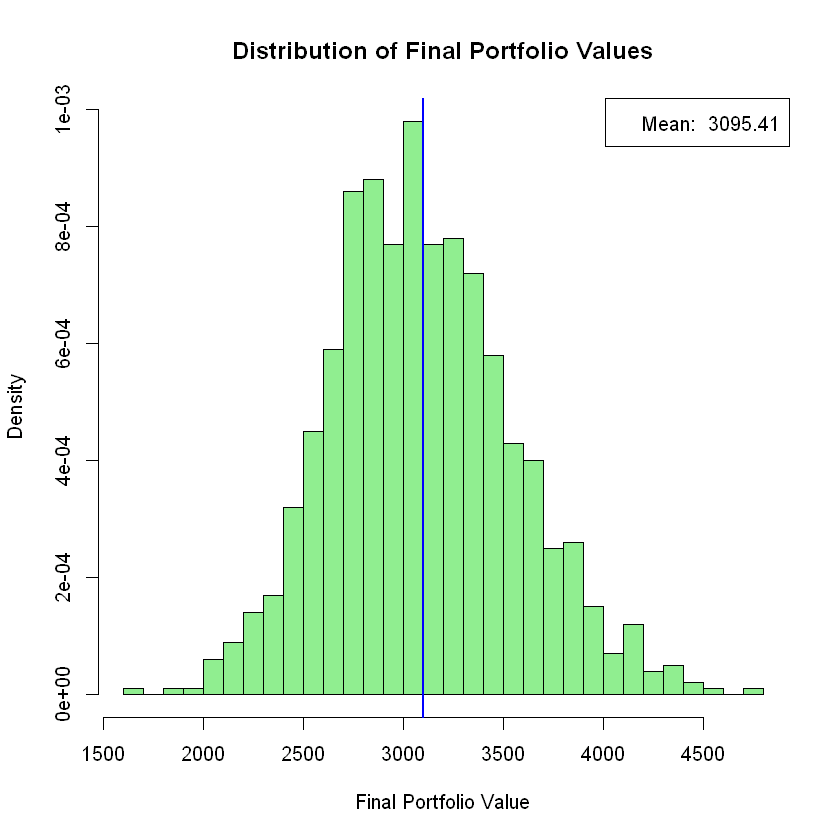

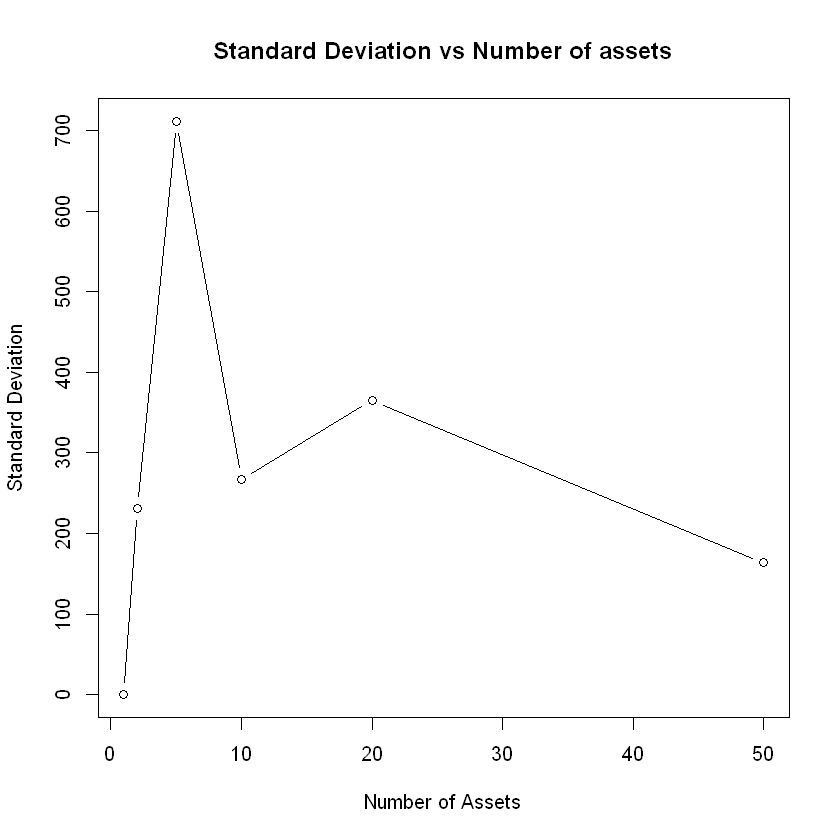

In [3]:
# Simulation parameters
num_assets <- 20      # Number of assets in the portfolio
num_simulations <- 1000 # Number of simulation runs
time_horizon <- 100    # Number of time periods (e.g., years)

# --- Asset Returns ---
# Generate random asset returns.  Assets are assumed to be independent.
# You can also introduce correlation if you want to make it more complex
set.seed(123)  # for reproducibility
asset_returns <- matrix(rnorm(num_assets * time_horizon, mean = 0.08, sd = 0.15),
                        nrow = time_horizon, ncol = num_assets)
#Explanation:
#rnorm(n,mean,sd) - function that draws n random sample from a normal distribution of mean and standard deviance sd.
#matrix - creating a matrix (table) object

# --- Simulation Loop ---
portfolio_values <- matrix(NA, nrow = num_simulations, ncol = time_horizon)

for (i in 1:num_simulations) {
  # Randomly assign weights to the assets (ensuring they sum to 1)
  asset_weights <- runif(num_assets)
  asset_weights <- asset_weights / sum(asset_weights) # Normalize to sum to 1

  # Calculate portfolio returns for each time period
  portfolio_returns <- rowSums(asset_returns * matrix(asset_weights, nrow = time_horizon, ncol = num_assets, byrow = TRUE))

  # Calculate portfolio value over time (assuming initial value of 1)
  portfolio_values[i,] <- cumprod(1 + portfolio_returns)
}

# --- Calculate Average Portfolio Value Across Simulations ---
average_portfolio_value <- colMeans(portfolio_values)

# --- Visualization ---

# 1. Plot individual portfolio paths and the average
matplot(t(portfolio_values), type = "l", lty = 1, col = "gray",
        xlab = "Time Period", ylab = "Portfolio Value",
        main = "Portfolio Values Over Time (Individual Simulations and Average)")
lines(average_portfolio_value, col = "red", lwd = 2)  # Average portfolio value
legend("topleft", legend = c("Individual Portfolios", "Average Portfolio"),
       col = c("gray", "red"), lty = 1, lwd = c(1, 2))

# 2. Plot distribution of portfolio values at the end of the time horizon
final_portfolio_values <- portfolio_values[, time_horizon]
hist(final_portfolio_values, breaks = 30, main = "Distribution of Final Portfolio Values",
     xlab = "Final Portfolio Value", col = "lightgreen", freq = FALSE)
abline(v = mean(final_portfolio_values), col = "blue", lwd = 2) # Mean final value
legend("topright", legend = paste("Mean: ", round(mean(final_portfolio_values), 2)))

# 3. Effect of Increasing Number of assets
num_assets_vector = c(1,2,5,10,20,50)
mean_vec = vector()
sd_vec = vector()
for(k in 1:length(num_assets_vector)){
  num_assets = num_assets_vector[k]
  asset_returns <- matrix(rnorm(num_assets * time_horizon, mean = 0.08, sd = 0.15),
                          nrow = time_horizon, ncol = num_assets)
  portfolio_values <- matrix(NA, nrow = num_simulations, ncol = time_horizon)
  for (i in 1:num_simulations) {
    # Randomly assign weights to the assets (ensuring they sum to 1)
    asset_weights <- runif(num_assets)
    asset_weights <- asset_weights / sum(asset_weights) # Normalize to sum to 1

    # Calculate portfolio returns for each time period
    portfolio_returns <- rowSums(asset_returns * matrix(asset_weights, nrow = time_horizon, ncol = num_assets, byrow = TRUE))

    # Calculate portfolio value over time (assuming initial value of 1)
    portfolio_values[i,] <- cumprod(1 + portfolio_returns)
  }
  final_portfolio_values <- portfolio_values[, time_horizon]
  mean_vec = c(mean_vec,mean(final_portfolio_values))
  sd_vec = c(sd_vec,sd(final_portfolio_values))
}
plot(num_assets_vector,sd_vec,xlab = "Number of Assets", ylab = "Standard Deviation", main = "Standard Deviation vs Number of assets", type="b")

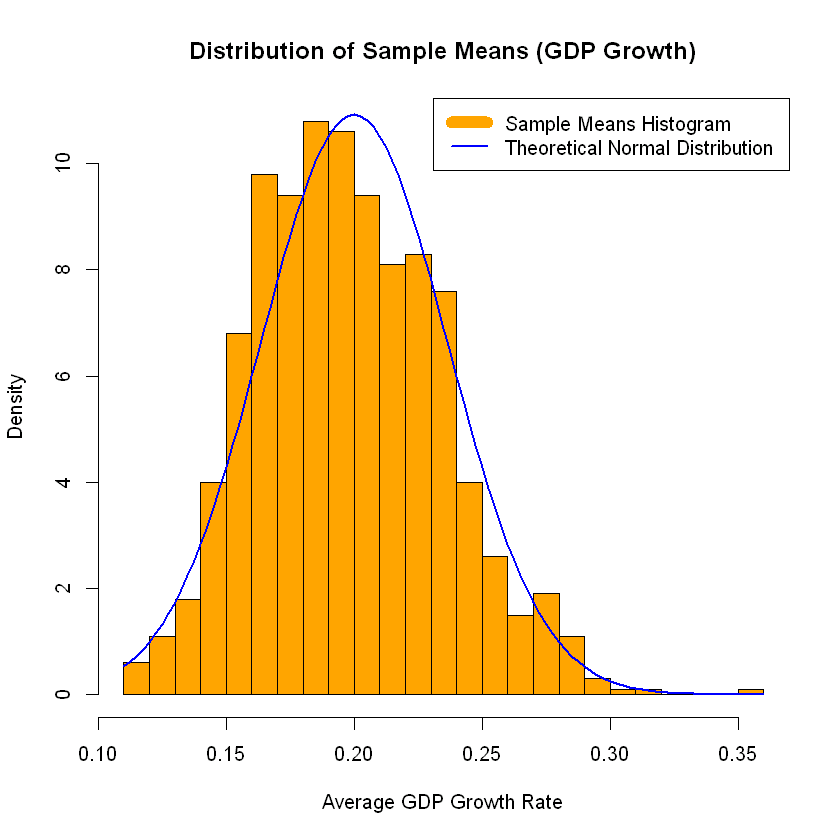

Population Mean (Exponential): 0.2 
Population SD (Exponential): 0.2 
Mean of Sample Means: 0.1979435 
SD of Sample Means: 0.03593759 
Theoretical Mean (CLT): 0.2 
Theoretical SD (CLT): 0.03651484 


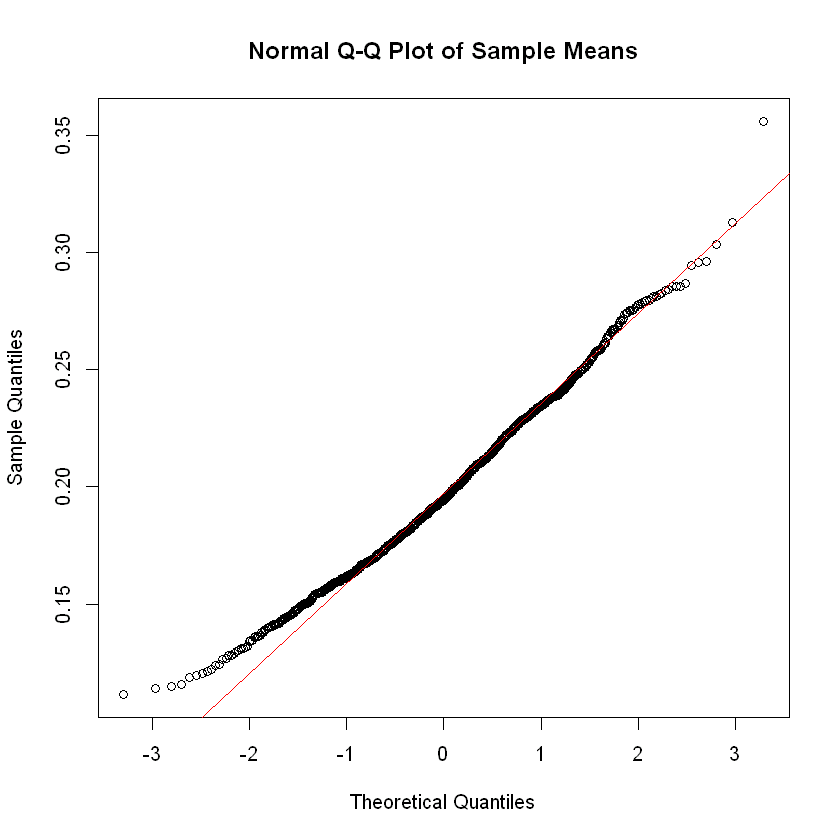

In [4]:
# Simulation parameters
num_simulations <- 1000 # Number of simulations
sample_size <- 30       # Number of years of GDP growth (sample size)

# --- GDP Growth Distribution ---
# Assume individual yearly GDP growth rates follow a non-normal distribution (e.g., exponential)
# Adjust the rate parameter (lambda) to change the shape of the distribution.
lambda <- 5
#Draw a GDP growth value
#rexp(n,lambda)
#n-number of values to be drawn
#lambda - rate parameter.
gdp_growth_rates <- rexp(num_simulations * sample_size, rate = lambda)
gdp_growth_rates <- matrix(gdp_growth_rates, nrow = num_simulations, ncol = sample_size)

# --- Simulation Loop ---
sample_means <- numeric(num_simulations)

for (i in 1:num_simulations) {
  sample_means[i] <- mean(gdp_growth_rates[i, ])
}

# --- Theoretical Normal Distribution (CLT) ---
# Calculate the theoretical mean and standard deviation of the sampling distribution
# of the sample means, based on the exponential distribution.
population_mean <- 1 / lambda  # Mean of exponential distribution
population_sd <- 1 / lambda    # SD of exponential distribution
theoretical_mean <- population_mean
theoretical_sd <- population_sd / sqrt(sample_size)

# Generate values from a normal distribution with the theoretical mean and SD
x <- seq(min(sample_means), max(sample_means), length = 100)
y <- dnorm(x, mean = theoretical_mean, sd = theoretical_sd)

# --- Visualization ---

# 1. Histogram of Sample Means with Normal Curve
hist(sample_means, breaks = 30, main = "Distribution of Sample Means (GDP Growth)",
     xlab = "Average GDP Growth Rate", col = "orange", freq = FALSE)
curve(dnorm(x, mean = theoretical_mean, sd = theoretical_sd),
      col = "blue", lwd = 2, add = TRUE) # Overlay the normal curve
legend("topright", legend = c("Sample Means Histogram", "Theoretical Normal Distribution"),
       col = c("orange", "blue"), lty = 1, lwd = c(10,2))
# 2. Q-Q Plot
qqnorm(sample_means, main = "Normal Q-Q Plot of Sample Means")
qqline(sample_means, col = "red")

#Print Result:
cat("Population Mean (Exponential):", population_mean, "\n")
cat("Population SD (Exponential):", population_sd, "\n")
cat("Mean of Sample Means:", mean(sample_means), "\n")
cat("SD of Sample Means:", sd(sample_means), "\n")
cat("Theoretical Mean (CLT):", theoretical_mean, "\n")
cat("Theoretical SD (CLT):", theoretical_sd, "\n")

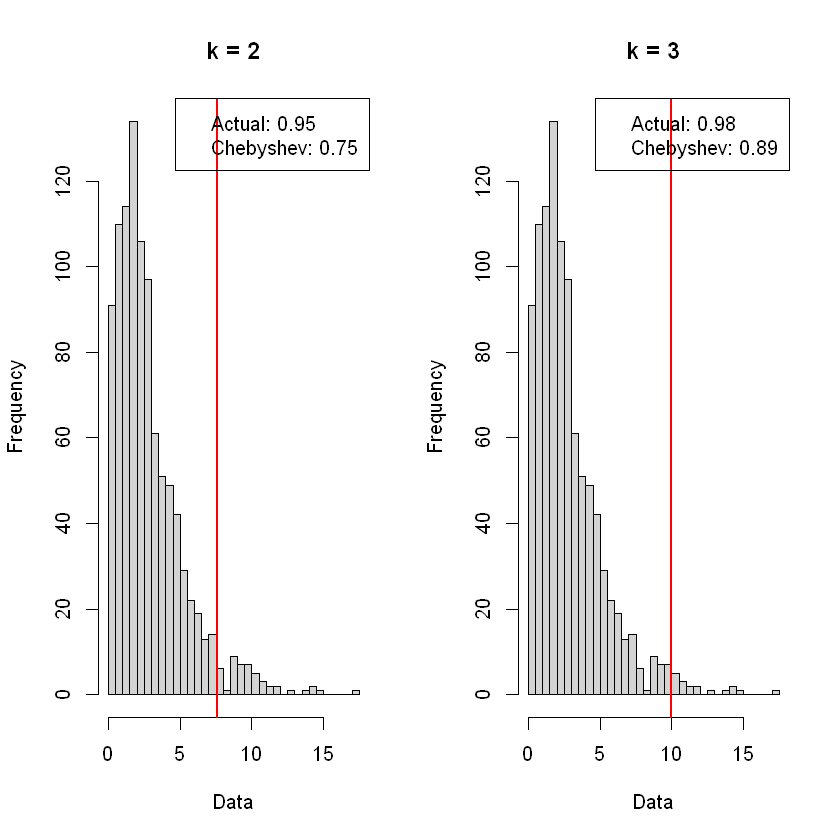

In [5]:
set.seed(123)
data <- rchisq(1000, df = 3)  # Skewed distribution
mu <- mean(data)
sigma <- sd(data)

k_values <- c(2, 3)
results <- sapply(k_values, function(k) {
  lower <- mu - k * sigma
  upper <- mu + k * sigma
  prop_within <- mean(data >= lower & data <= upper)
  chebyshev_bound <- 1 - 1/k^2
  c(prop_within, chebyshev_bound)
})

# Plot
par(mfrow = c(1, 2))
for (i in seq_along(k_values)) {
  k <- k_values[i]
  lower <- mu - k * sigma
  upper <- mu + k * sigma
  hist(data, breaks = 30, main = paste("k =", k), xlab = "Data")
  abline(v = c(lower, upper), col = "red", lwd = 2)
  legend("topright", legend = c(
    paste("Actual:", round(results[1, i], 2)),
    paste("Chebyshev:", round(results[2, i], 2))
  ))
}

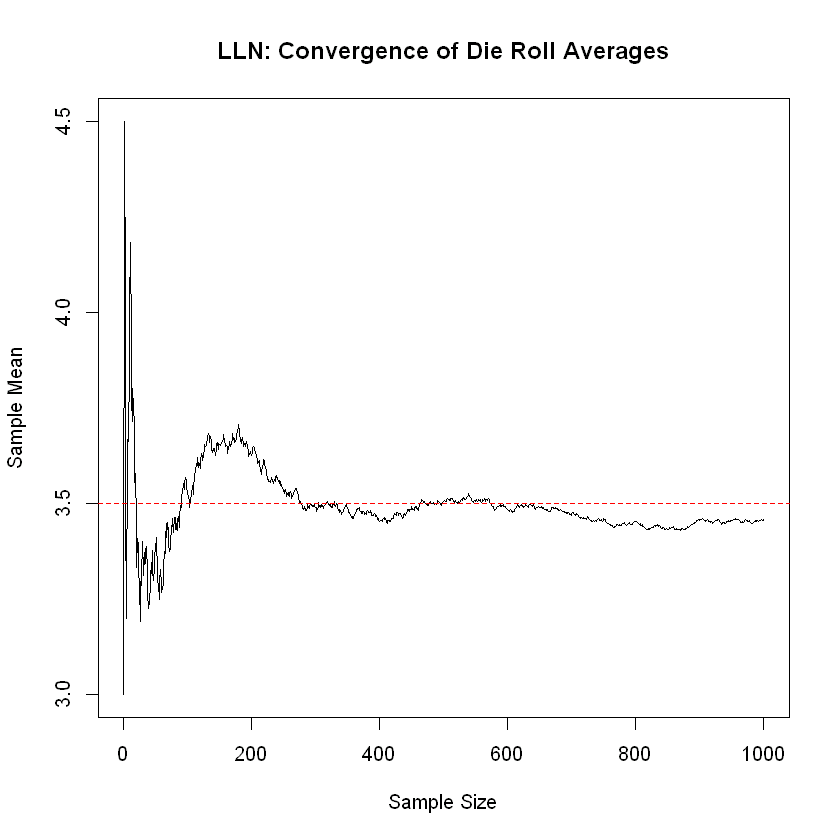

In [6]:
set.seed(123)
max_n <- 1000
die_rolls <- sample(1:6, max_n, replace = TRUE)
sample_means <- cumsum(die_rolls) / (1:max_n)

plot(1:max_n, sample_means, type = "l", 
     xlab = "Sample Size", ylab = "Sample Mean", 
     main = "LLN: Convergence of Die Roll Averages")
abline(h = 3.5, col = "red", lty = 2)

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


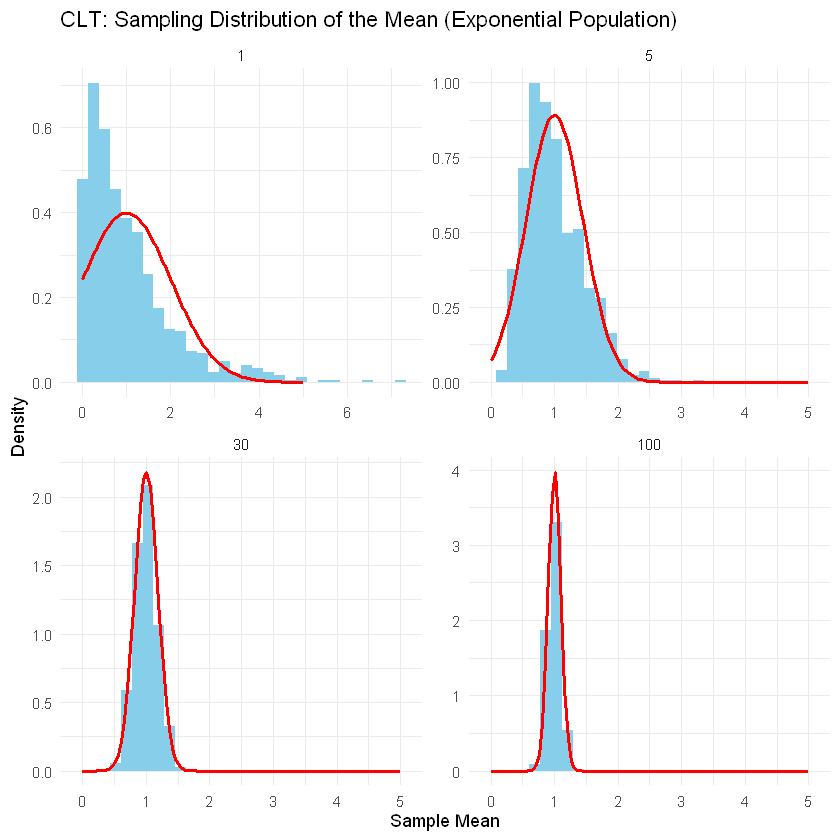

In [7]:
set.seed(123)
n_values <- c(1, 5, 30, 100)
reps <- 1000
clt_data <- data.frame()

for (n in n_values) {
  means <- replicate(reps, mean(rexp(n, rate = 1)))
  clt_data <- rbind(clt_data, data.frame(n = factor(n), mean = means))
}

# Theoretical normal curves
x_seq <- seq(0, 5, length.out = 100)
normal_curves <- data.frame()
for (n in n_values) {
  sd_theory <- 1 / sqrt(n)  # SD of sample mean = population SD / sqrt(n)
  y <- dnorm(x_seq, mean = 1, sd = sd_theory)
  normal_curves <- rbind(normal_curves, data.frame(n = factor(n), x = x_seq, y = y))
}

library(ggplot2)
ggplot(clt_data, aes(x = mean)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue") +
  geom_line(data = normal_curves, aes(x = x, y = y), color = "red", linewidth = 1) +
  facet_wrap(~n, scales = "free") +
  labs(title = "CLT: Sampling Distribution of the Mean (Exponential Population)",
       x = "Sample Mean", y = "Density") +
  theme_minimal()

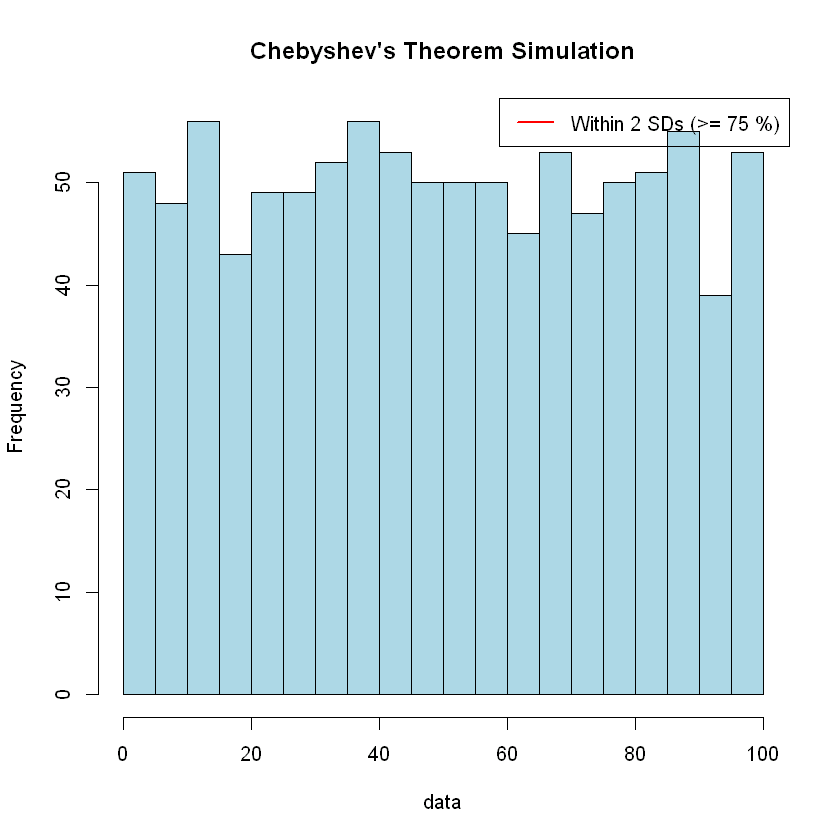

In [8]:
set.seed(123)
data <- runif(1000, min = 0, max = 100)  # Uniform distribution
mean_data <- mean(data)
sd_data <- sd(data)
k <- 2  # Number of standard deviations
chebyshev_bound <- 1 - 1 / (k^2)

hist(data, breaks = 30, col = 'lightblue', main = 'Chebyshev\'s Theorem Simulation')
abline(v = c(mean_data - k * sd_data, mean_data + k * sd_data), col = 'red', lwd = 2)
legend('topright', legend = paste('Within', k, 'SDs (>=', round(chebyshev_bound*100, 2), '%)'), col = 'red', lwd = 2)


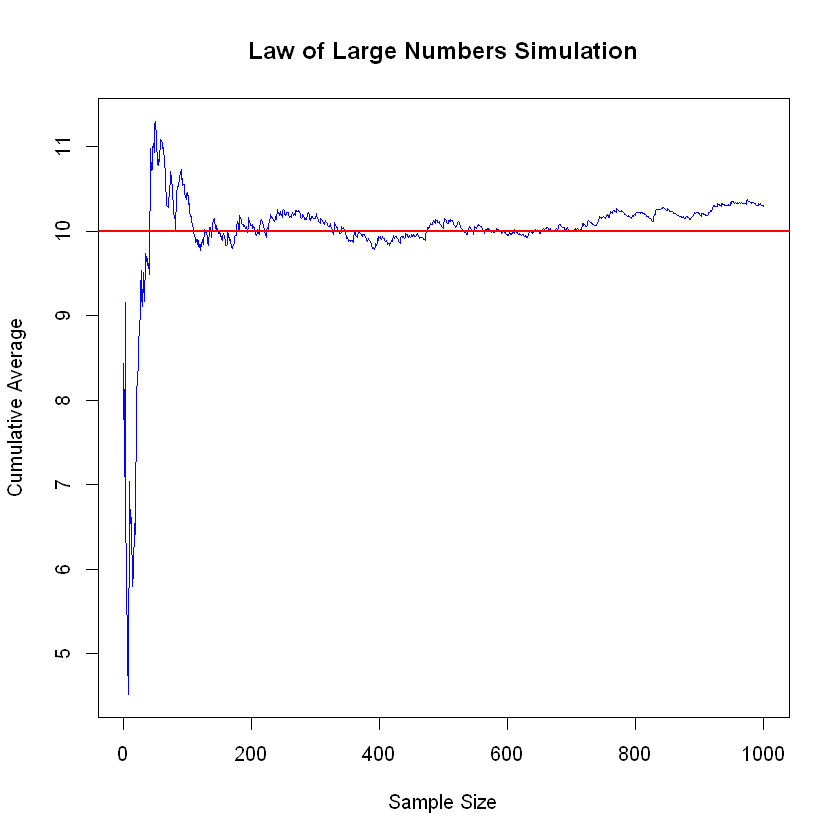

In [9]:
set.seed(123)
n <- 1000
data <- rexp(n, rate = 0.1)
means <- cumsum(data) / (1:n)

plot(means, type = 'l', col = 'blue', xlab = 'Sample Size', ylab = 'Cumulative Average', main = 'Law of Large Numbers Simulation')
abline(h = 10, col = 'red', lwd = 2)  # Theoretical mean for exponential distribution (1/rate)


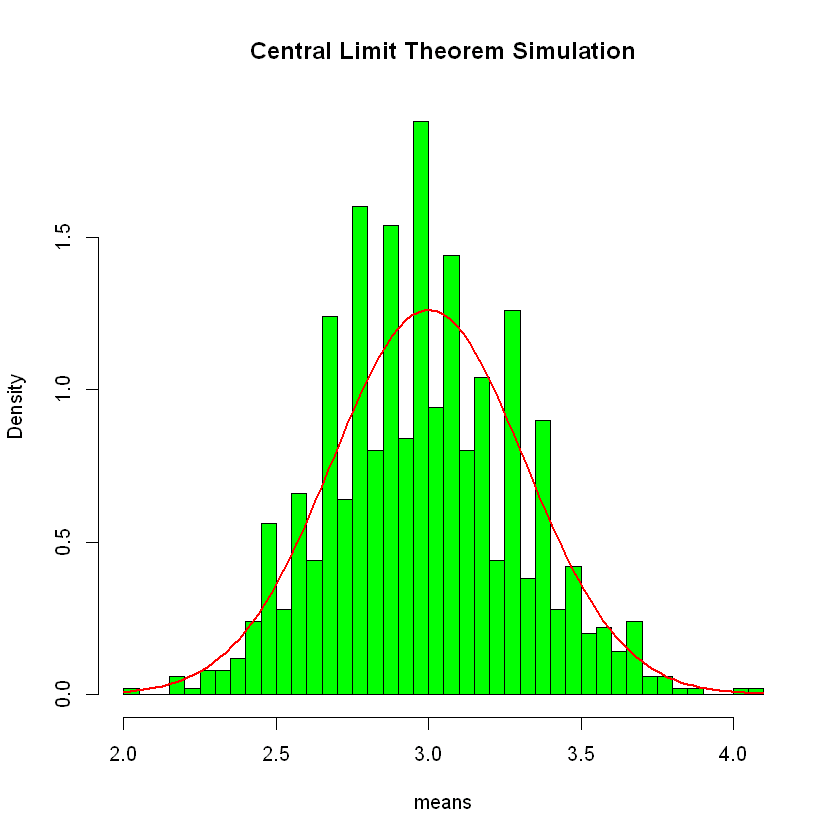

In [12]:
set.seed(123)
sample_size <- 30
num_samples <- 1000
means <- replicate(num_samples, mean(rpois(sample_size, lambda = 3)))

hist(means, breaks = 30, probability = TRUE, col = 'green', main = 'Central Limit Theorem Simulation')
curve(dnorm(x, mean = 3, sd = sqrt(3/sample_size)), add = TRUE, col = 'red', lwd = 2)
